In [2]:
import os

path = '../data/dogs-vs-cats/train/'
os.listdir(path)

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10040.jpg',
 'cat.10041.jpg',
 'cat.10042.jpg',
 'cat.10043.jpg',
 'cat.10044.jpg',
 'cat.10045.jpg',
 'cat.10046.jpg',
 'cat.1004

In [3]:
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

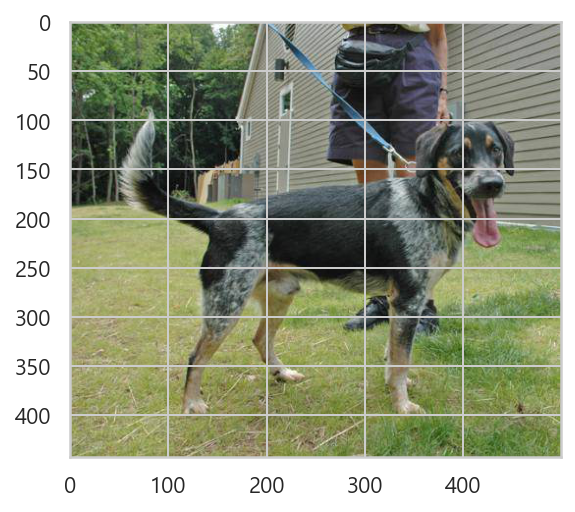

In [4]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample = random.choice(full_names)
image = mpimg.imread(path+sample)
plt.imshow(image)
plt.show()

In [6]:
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
image.shape

(500, 288, 3)

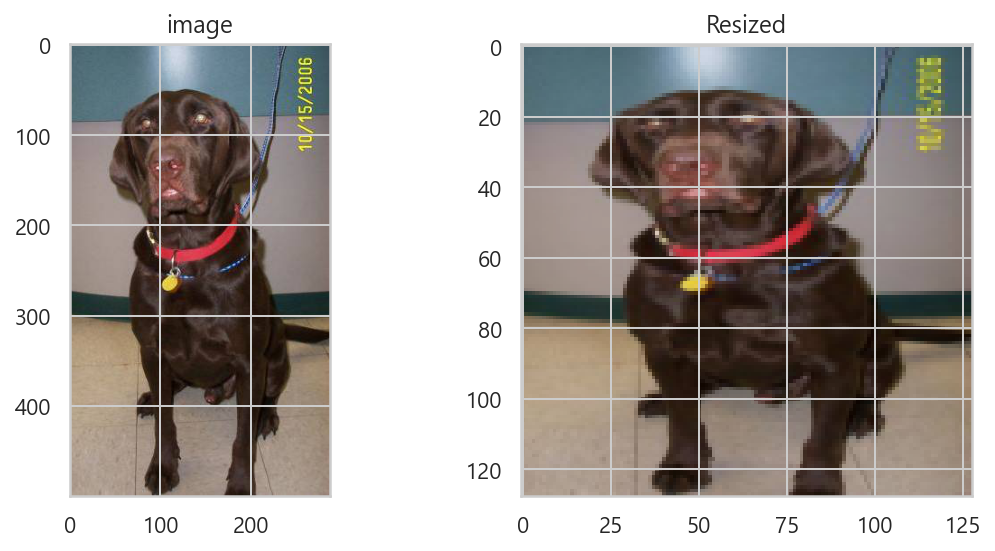

In [8]:
from skimage.transform import resize

resized = resize(image, (128, 128, 3))

fig, axes = plt.subplots(1, 2, figsize=(8,4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('image')
ax[1].imshow(resized, cmap=plt.cm.gray)
ax[1].set_title('Resized')

fig.tight_layout()
plt.show()

In [9]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(full_names)
for file in bar_total:
    image = mpimg.imread(path+file)
    images.append(resize(image, (128,128,3)))

images = np.array(images)

In [10]:
images.shape, labels[:3]

((25000, 128, 128, 3), ['cat', 'cat', 'cat'])

In [11]:
images[:3]

array([[[[7.97855392e-01, 6.44914216e-01, 3.42953431e-01],
         [8.17095588e-01, 6.64154412e-01, 3.62193627e-01],
         [8.24571078e-01, 6.71629902e-01, 3.69669118e-01],
         ...,
         [9.64705882e-01, 8.08884804e-01, 4.87316176e-01],
         [9.56862745e-01, 7.97487745e-01, 4.71997549e-01],
         [9.39031863e-01, 7.86090686e-01, 4.74509804e-01]],

        [[7.97855392e-01, 6.44914216e-01, 3.42953431e-01],
         [8.17095588e-01, 6.64154412e-01, 3.62193627e-01],
         [8.24571078e-01, 6.71629902e-01, 3.69669118e-01],
         ...,
         [9.61825980e-01, 8.12806373e-01, 4.98283835e-01],
         [9.56862745e-01, 8.01244160e-01, 4.79381127e-01],
         [9.42953431e-01, 7.90012255e-01, 4.78431373e-01]],

        [[7.97855392e-01, 6.44914216e-01, 3.42953431e-01],
         [8.17095588e-01, 6.64154412e-01, 3.62193627e-01],
         [8.24571078e-01, 6.71629902e-01, 3.69669118e-01],
         ...,
         [9.64705882e-01, 8.19883578e-01, 5.06158088e-01],
         [

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([0, 0, 0], dtype=int64), array(['cat', 'dog'], dtype='<U3'))

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=13, stratify=labels_encoded)

X_train.shape, X_test.shape

((20000, 128, 128, 3), (5000, 128, 128, 3))

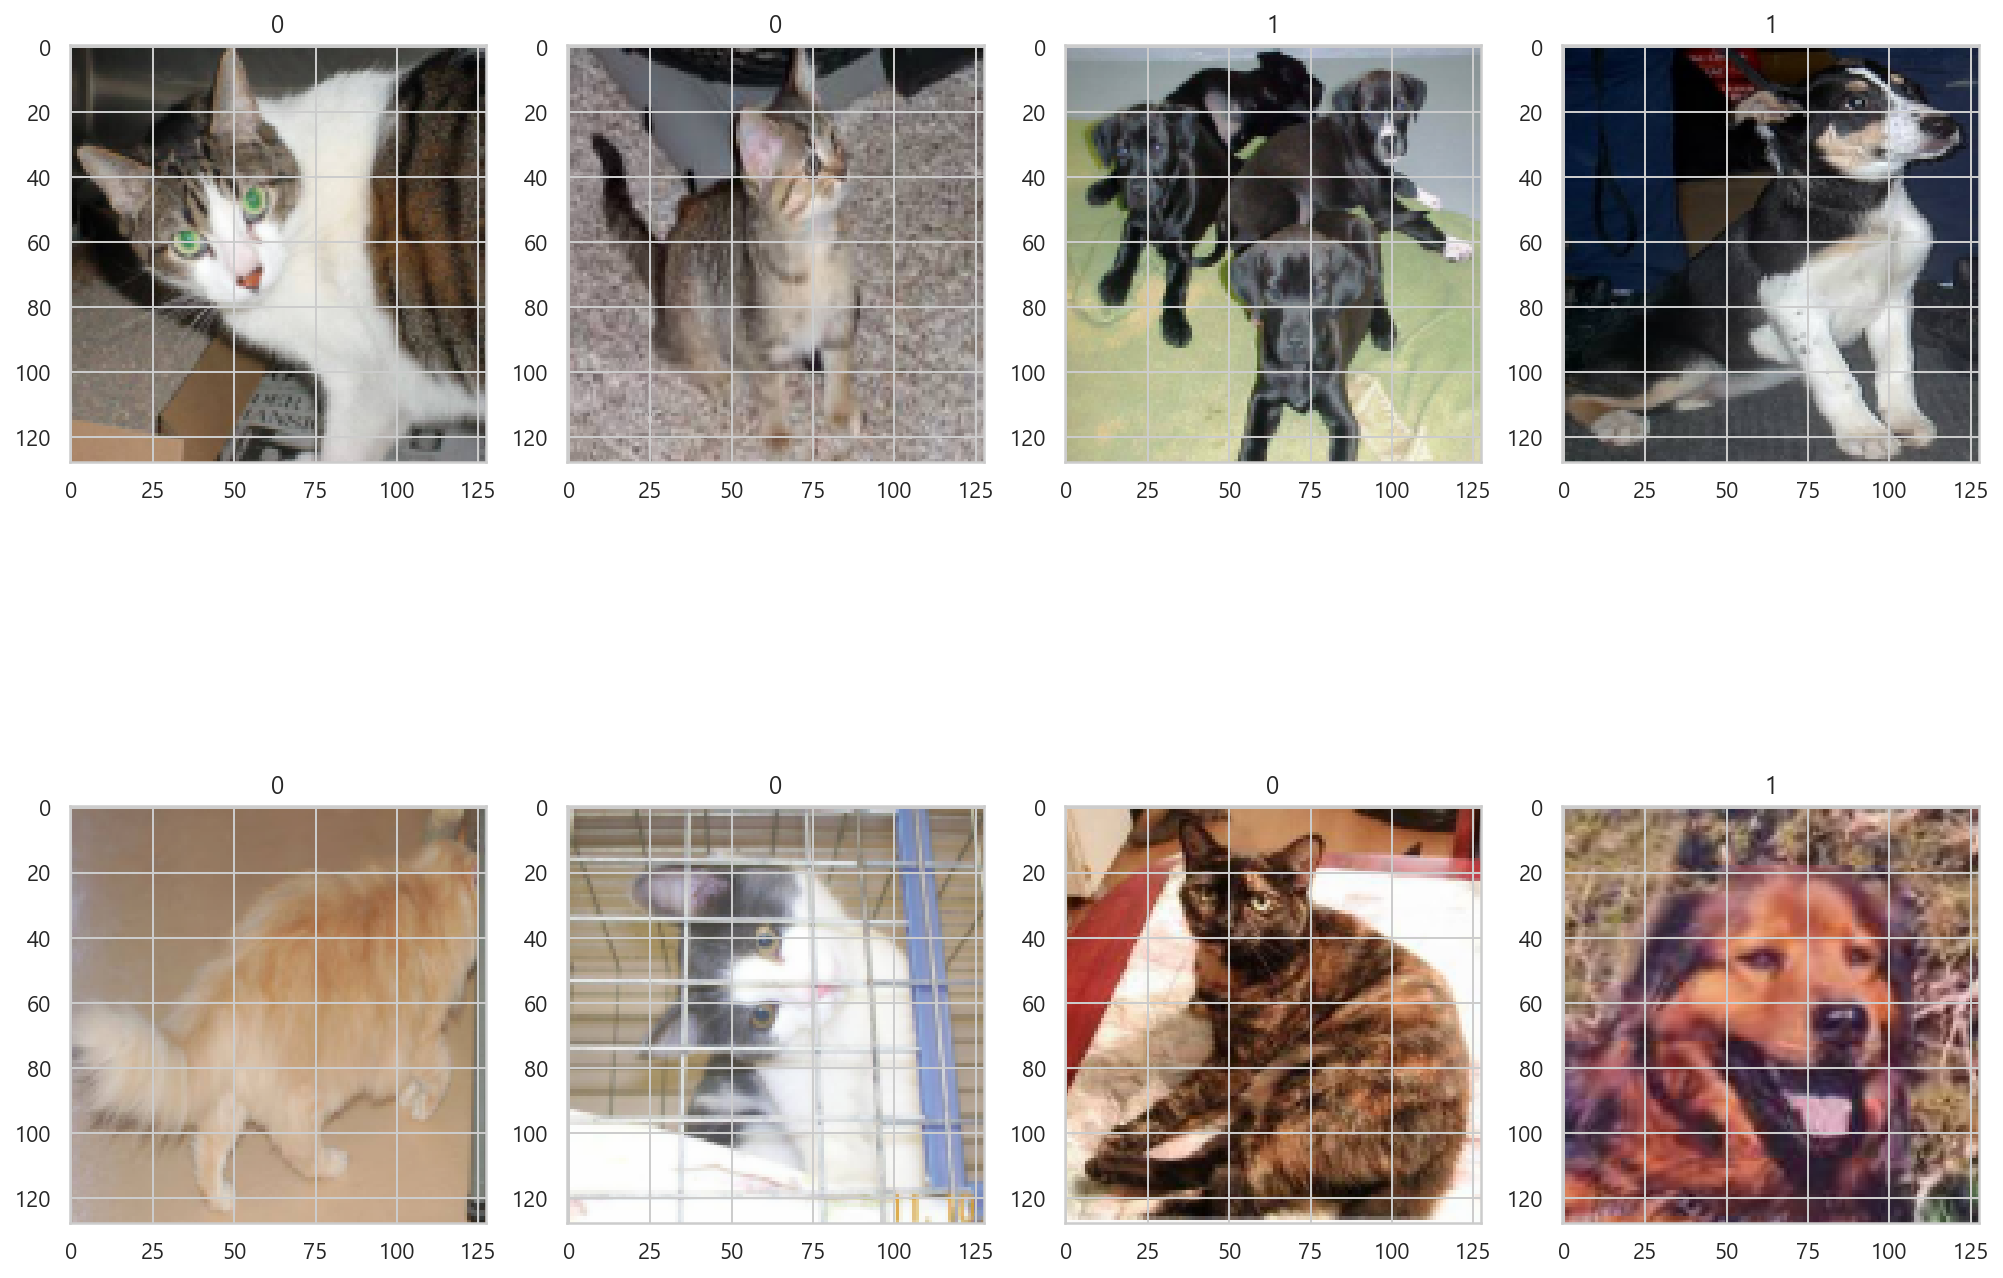

In [16]:
samples = random.choices(population=range(0, 20000), k=8)

plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx+1)
    plt.imshow(X_train[n], cmap='Greys', interpolation='nearest')
    plt.title(y_train[n])
    
plt.tight_layout()
plt.show()

In [18]:
from tensorflow.keras import layers, models


model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        3

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
import time

start_time = time.time()
hist = model.fit(X_train.reshape(20000, 128, 128, 3), y_train, epochs=5, verbose=1, batch_size=1, validation_data= (X_test.reshape(5000, 128, 128, 3), y_test))
print('fit time : ', time.time() - start_time)

Epoch 1/5
20000/20000 [==============================] - 1103s 55ms/step - loss: 0.6935 - accuracy: 0.5311 - val_loss: 0.6874 - val_accuracy: 0.5442
Epoch 2/5
20000/20000 [==============================] - 1094s 55ms/step - loss: 0.6809 - accuracy: 0.5619 - val_loss: 0.6801 - val_accuracy: 0.5616
Epoch 3/5
20000/20000 [==============================] - 1050s 53ms/step - loss: 0.6704 - accuracy: 0.5933 - val_loss: 0.6757 - val_accuracy: 0.5906
Epoch 4/5
20000/20000 [==============================] - 1101s 55ms/step - loss: 0.6592 - accuracy: 0.6148 - val_loss: 0.6954 - val_accuracy: 0.5380
Epoch 5/5
20000/20000 [==============================] - 1060s 53ms/step - loss: 0.6534 - accuracy: 0.6202 - val_loss: 0.6533 - val_accuracy: 0.6154
fit time :  5436.475395441055


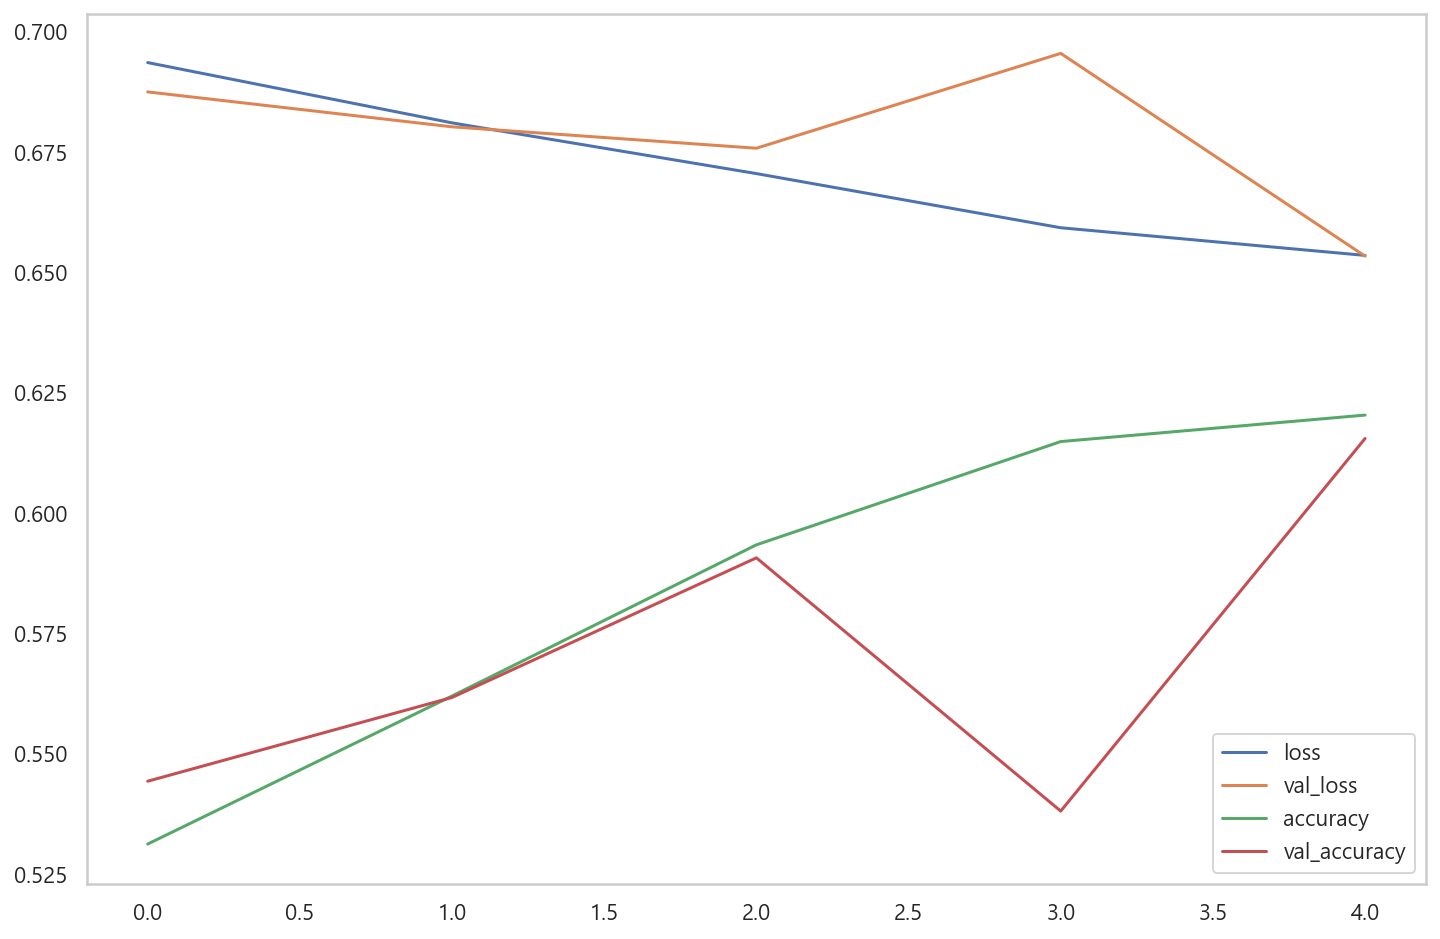

In [22]:
plot_target = ['loss','val_loss','accuracy','val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()